# Compiling and simulating a 10-qubit Quantum Fourier Transform (QFT) algorithm

In this notebook, we simulate a 10-qubit Quantum Fourier Transform (QFT) algorithm.
The QFT algorithm is one of the most important quantum algorithms in quantum computing.
It is, for instance, part of the Shor algorithm for integer factorization.
The following code defines a 10-qubit QFT algorithm using CNOT and single qubit rotations and runs the simulation both at the gate level and at the pulse level.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import basis, fidelity
from qutip_qip.device import LinearSpinChain
from qutip_qip.algorithms import qft_gate_sequence

num_qubits = 10
# The QFT circuit
qc = qft_gate_sequence(num_qubits, swapping=False, to_cnot=True)
# Gate-level simulation
state1 = qc.run(basis([2]*num_qubits, [0]*num_qubits))
# Pulse-level simulation
processor = LinearSpinChain(num_qubits)
processor.load_circuit(qc)
state2 = processor.run_state(basis([2]*num_qubits, [0]*num_qubits)).states[-1]
fidelity(state1, state2)

0.9999558916298081

We plot the compiled pulses in the cell below.
The pulses plotted implement the QFT algorithm represented in the native gates of the spin chain model, with single-qubit gates marked by rotations over the $x$- and $z$-axes and the iSWAP gate implemented through the spin-spin exchange interaction, marked by $g_i$.
While the sign for single-qubit drive denotes the phase of the control pulse, the negative sign in the coupling strengths $g_i$ is only a result of the convention used in the definition of the interaction, defined in \cref{eq:ham spin chain}.

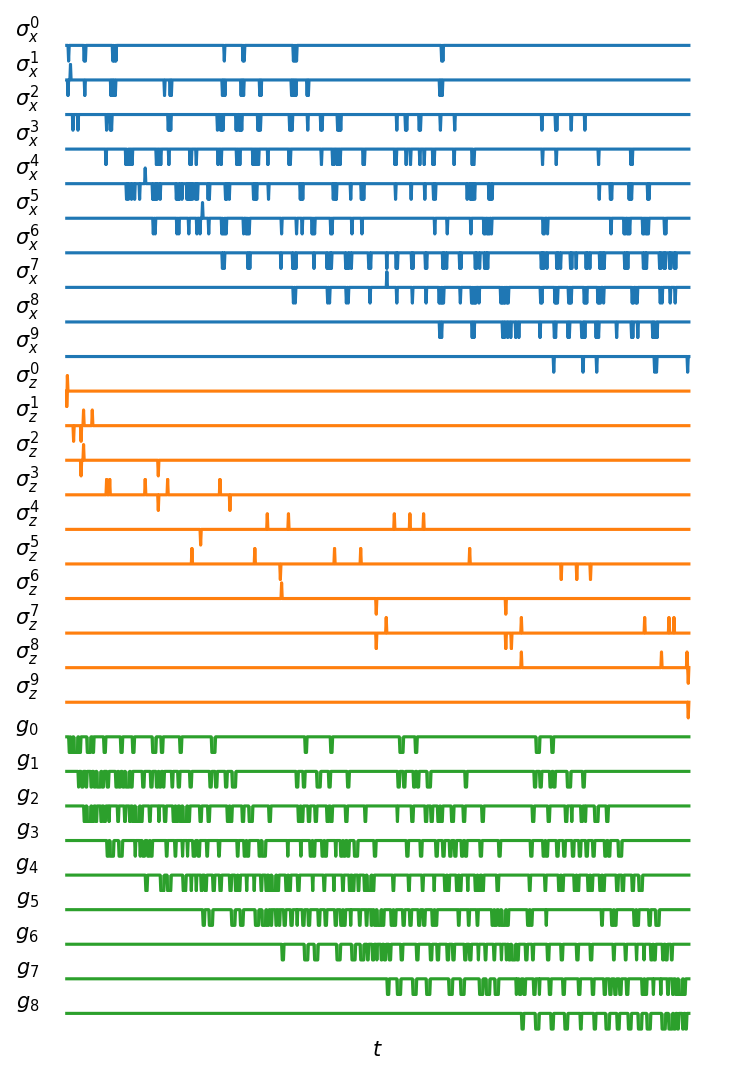

In [2]:
def get_control_latex(model):
    """
    Get the labels for each Hamiltonian.
    It is used in the method method :meth:`.Processor.plot_pulses`.
    It is a 2-d nested list, in the plot,
    a different color will be used for each sublist.
    """
    num_qubits = model.num_qubits
    num_coupling = model._get_num_coupling()
    return [
        {f"sx{m}": r"$\sigma_x^{}$".format(m) for m in range(num_qubits)},
        {f"sz{m}": r"$\sigma_z^{}$".format(m) for m in range(num_qubits)},
        {
            f"g{m}": r"$g_{}$".format(m) for m in range(num_coupling)
        },
    ]

fig, axes = processor.plot_pulses(figsize=(5, 7), dpi=150,
    pulse_labels=get_control_latex(processor.model))
axes[-1].set_xlabel("$t$");

In [3]:
import qutip_qip
print("qutip-qip version:", qutip_qip.version.version)
from qutip.ipynbtools import version_table
version_table()

qutip-qip version: 0.2.0


Software,Version
QuTiP,4.6.3
Numpy,1.22.2
SciPy,1.8.0
matplotlib,3.5.1
Cython,0.29.27
Number of CPUs,12
BLAS Info,OPENBLAS
IPython,8.0.1
Python,"3.9.0 | packaged by conda-forge | (default, Nov 26 2020, 07:53:15) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]
